# Quantum Computing
***
This is a notebook on Quantum Computing.

Quantum Computing has been around since the 1980's when Paul Benioff first proposed it on a turning machine. A quantum computer is meant to simulate things that a normal computer can not feasibly do.

Quantum computers are needed to solve complex problems which can't be done with normal computers, such as poorly explained circumstances.

#### [IBM on Quantum Computing;](https://www.ibm.com/topics/quantum-computing)IBM
#### [Problems Computers can't solve;](https://www.inc.com/magazine/19820301/7600.html)Inc
#### [Intro exercises on Quantum Computing;](https://towardsdatascience.com/what-is-quantum-entanglement-anyway-4ea97df4bb0e)Towardsdatascience

### Quantum Operations
***

- Single Qubit gates these are U gate - P gate - Identity gate - Pauli gates - Clifford gates -  gates - Standard rotation gates, such gates are in tune with the rotations of the axis in some form, single qubit gates are made with xy plane in mind 
#### [Single Qubit gates;](https://www.sciencedirect.com/topics/mathematics/single-qubit#:~:text=2.2%20Single%20qubit%20gates,implemented%20using%20resonant%20RF%20pulses.)Sciencedirect
***

- Multi Qubit gates, space on a quantum computer grows exponentially, the tensor product of which a tensor is a representation of a quantum circuit. These tensor products combine together operators and basis vectors.
#### [Multi Qubit gates;](https://www.geeksforgeeks.org/what-is-multi-qubit-systems/.)Geeksforgeeks
#### [About Tensors;](https://pennylane.ai/qml/demos/tutorial_tn_circuits.html#:~:text=Every%20quantum%20circuit%20can%20be,these%20tensor%2Dnetwork%20quantum%20circuits.)Pennylane

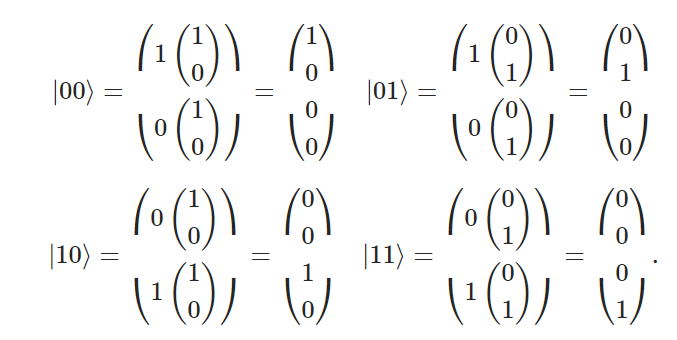

### Measurements
***
- Measurements is the testing or manipulation of a physical system to yield a numerical result, normally haven't all the info when you make a Measurement in Quantum computing, the quantum state is put onto a standard basis .
#### [Measurements;](https://towardsdatascience.com/understanding-basics-of-measurements-in-quantum-computation-4c885879eba0)Towardsdatascience

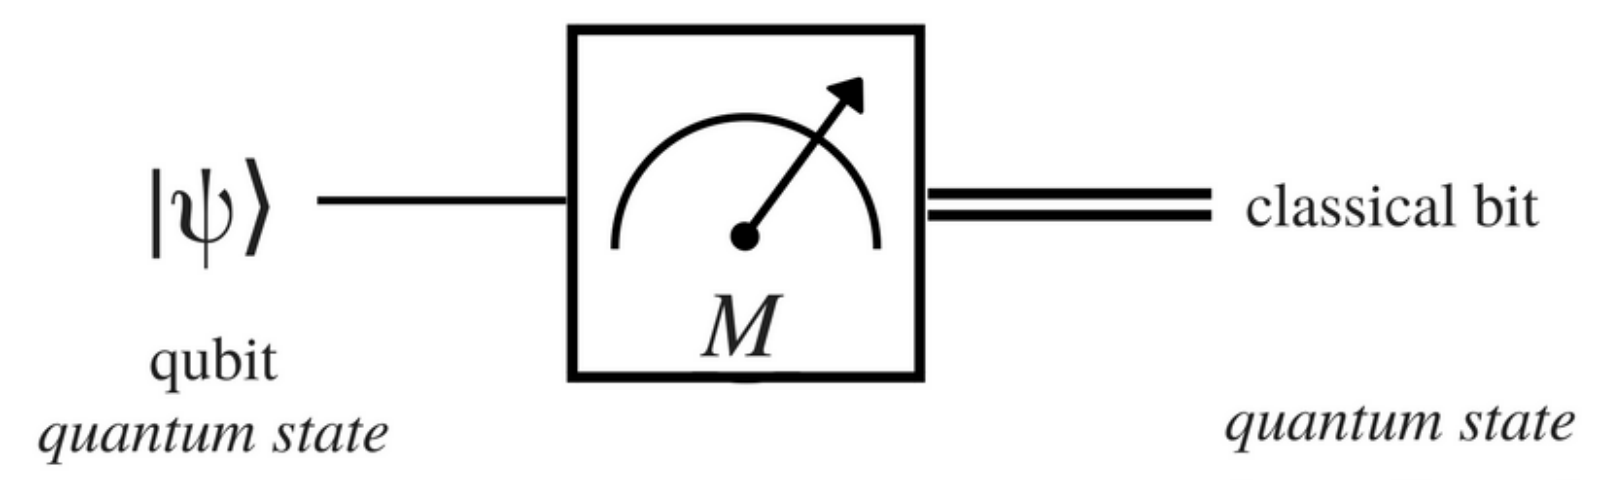

### Reset
***
- Reset is to be used when in the middle of a quantum computation to revert qubits to |0> state, it is also used to get mid-circuit measurements 
#### [Reset;](https://www.ibm.com/blogs/research/2021/02/quantum-mid-circuit-measurement/)IBM

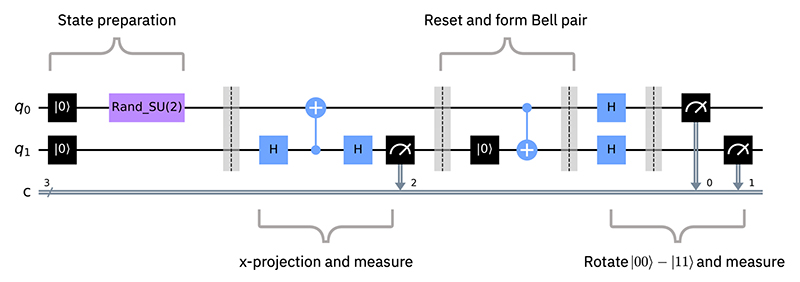

In [3]:
# qiskit is open source for using quantum computting
from qiskit import __version__

# Qiskit Visualisation contains functions that visualizes quantum states and more
import qiskit.visualization as viz

# Generating random numbers.
import numpy as np

# Plotting.
# seaborn is based on matplotlib for data visualization 
import seaborn as sns

# functions for randomising ints
import random

# provides fast way of looping to get different results
import itertools

# provides functions which can manipulate different parts of the Python runtime environment
import sys

# The tools needed
# Register is to define qubits
from qiskit import QuantumRegister, ClassicalRegister

# QuantumCircuit is computational routine
from qiskit import QuantumCircuit

# Aer is a high performance simulator
from qiskit import Aer

from qiskit import execute

# Qiskit.visualization allows to make cool plots 
import qiskit.visualization   
from qiskit.visualization import plot_histogram                                     

In [4]:
# allows us to do quantum simulation of measurements 
M_simulator=Aer.backends(name='qasm_simulator')[0]

#Qubits filled with two
qBits=QuantumRegister(2)

# Classical bits filled also with two
cBits=ClassicalRegister(2)

# Put qBits and cBits together to make a Quantum Circuit, called entangler
entangler=QuantumCircuit(qBits,cBits)

# Apply Hadamard gate to the first qubit 
entangler.h(0)

# Apply the CNOT gate with the first qubit as the control and second qubit as the target
entangler.cx(0,1)

# measure the first qubit and record it
entangler.measure(0,0)

# measure the second qubit and record it 
entangler.measure(1,1)

#entangler.draw(output='mpl')
print(entangler)

      ┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1 


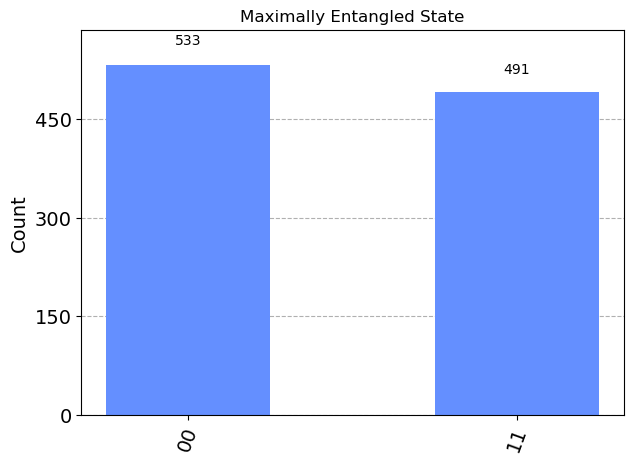

In [5]:
#executes numerous measurements
job=execute(entangler, M_simulator) 

#gives us histogram results 
hist=job.result().get_counts() 

#plot a stunning visualization
plot_histogram(data=hist, title="Maximally Entangled State")

## Flipping a Coin
***

In [6]:
# Flip one coin.
# binomial is a distribution which tells us the possibility of a variable will take one of two numbers/values
np.random.binomial(1, 0.5)

0

In [7]:
# Flip twenty coins.
# Random built in module to randomise numbers
np.random.binomial(1, 0.5, 20)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [8]:
# Flip a coin one hundred times, counting total heads.
# changes everytime
np.random.binomial(100, 0.5)

52

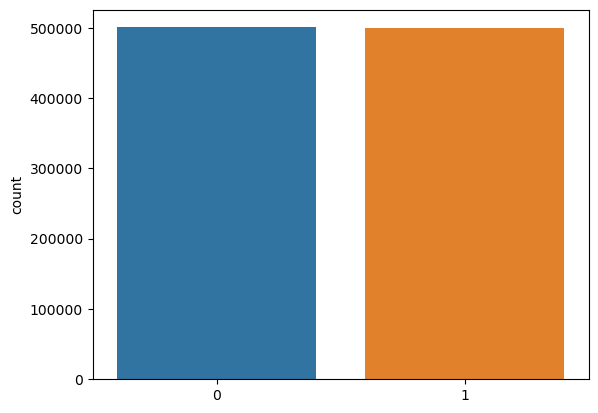

In [9]:
# Should be 50/50.
# show counts of observations
sns.countplot(x=np.random.binomial(1, 0.5, 1000000));

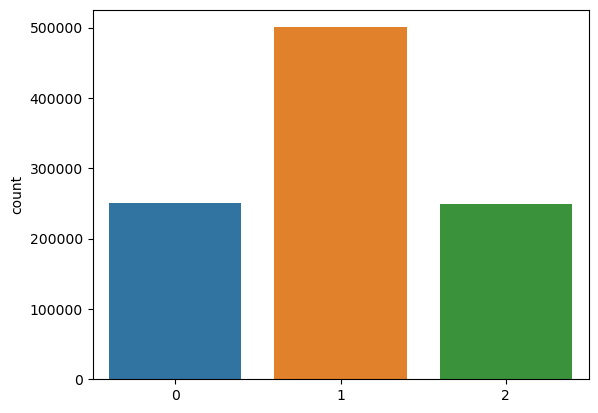

In [10]:
# Outcomes of flipping two coins.
sns.countplot(x=np.random.binomial(2, 0.5, 1000000));

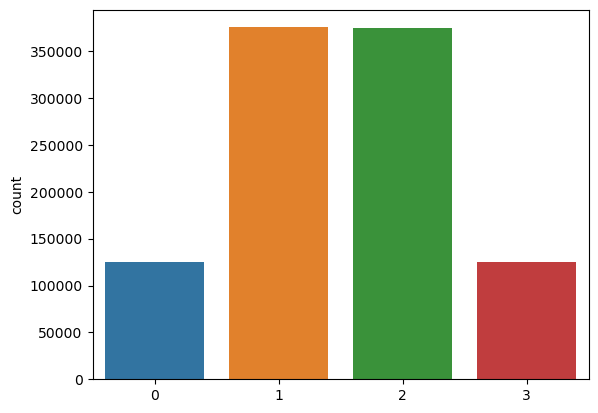

In [11]:
# Outcomes of flipping three coins.
sns.countplot(x=np.random.binomial(3, 0.5, 1000000));

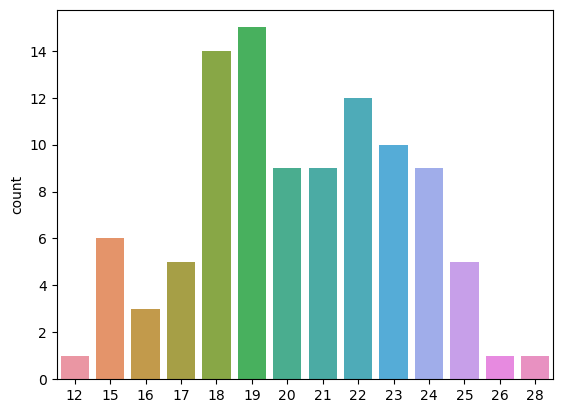

In [12]:
# Outcomes of flipping forty coins.
sns.countplot(x=np.random.binomial(40, 0.5, 100));

## Deutsch-Jozsa Algorithm
***
The Deutsch-Jozsa algorithm is was the first example of a quantum algorithm, that executes the classical algorithm better.

In [13]:
def f1(x):
    if x == 0:
        return 0
    else:
        return 0

In [14]:
def f2(x):
    if x == 0:
        return 0
    else:
        return 1

In [15]:
def f3(x):
    if x == 0:
        return 1
    else:
        return 0

In [16]:
def f4(x):
    if x == 0:
        return 1
    else:
        return 1

In [17]:
# Insert the above at random
# pointer to object f4 or f3 etc.
Y = [f1, f2, f3, f4]

f = random.choice(Y)

f(0)

0

In [18]:
# evaluate balenced constant
f(1)

1

In [19]:
list(itertools.product([0,1], repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [20]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=2))
    chosen_L = random.choice(possible_Ls)
    
    # defining a function inside a function
    # name is scoped
    def f(x):
        return chosen_L[x]
    return f

In [21]:
f = random_f() # when we invoke this and it creates f so long as we have a pointer to f, garbage collecter won't pick it up
# random f should now be gone off the stack after the above

In [22]:
f(0)

1

In [23]:
#constant
f(1)

0

In [24]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=3))
    chosen_L = random.choice(possible_Ls)
    
    # defining a function inside a function
    # name is scoped
    def f(x):
        return chosen_L[x]
    return f

In [25]:
f = random_f()

f(0)

0

In [26]:
f(1)

1

## Quantum Gates
***
Quantum gates are logic based gates definitely the quantum circuit model of computation, these operations are carried out by a small number of qubits and are the foundation of quantum circuits

### H Gate
***
A h gate is a Hadamard gate and is the most frequent used quantum gate in quantum computting, it is used to convert qubits from a clustered state to a uniform one.

#### [Hadamard Gate;](https://www.sciencedirect.com/topics/engineering/hadamard-gate)Sciencedirect

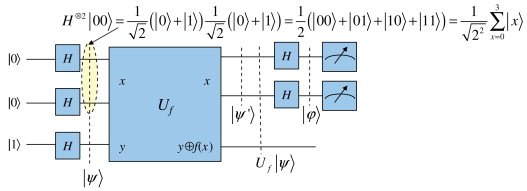

In [27]:
# Create a circuit which are collections of quantum gates
circuit = qiskit.QuantumCircuit(1, 1)

# Add a Hadamard gate.
circuit.h(0)

# Measure quantum bit into classical
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


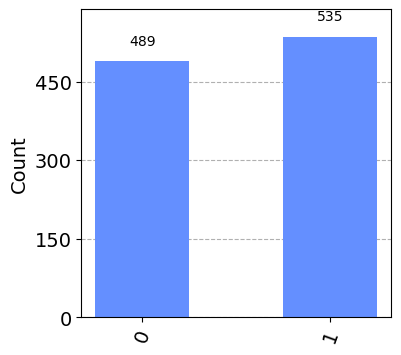

In [28]:
# Get a simulator, aer provides high perfomance quantum computing simulators
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit using run and get counts
result = sim.run(circuit).result().get_counts()

# plot the histogram using visualization
viz.plot_histogram(result, figsize=(4, 4))

### X Gate
***
Pauli-X gate is another name for the X gate, it is a single-qubit rotation through π radians around the x-axis

#### [Pauli-X Gate;](https://www.quantum-inspire.com/kbase/pauli-x/)Quantum-inspire

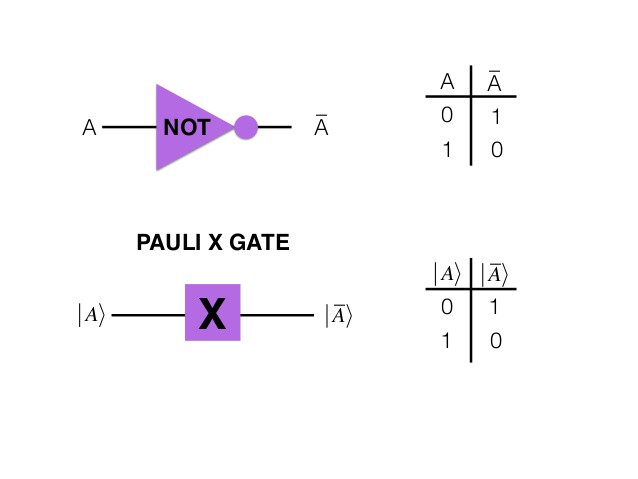

In [29]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.x(0)

# Measure.
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


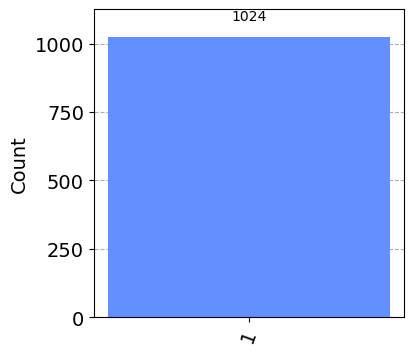

In [30]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

In [31]:
# An X-gate on a |0> qubit
qc = QuantumCircuit(1)

qc.x(0)

qc.draw()

┌───┐
q: ┤ X ├
   └───┘

### Y Gate
***
Like X, Y gate is a Pauli Gate. It is a a single-qubit rotation through π radians around the y-axis.

#### [Pauli-Y Gate;](https://deeplearninguniversity.com/qiskit/qiskit-y-gate/)Quantum-inspire

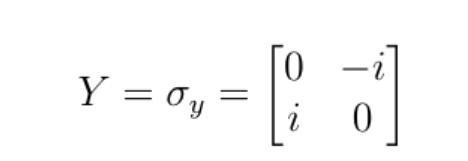

In [32]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.y(0)

# Measure.
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ Y ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


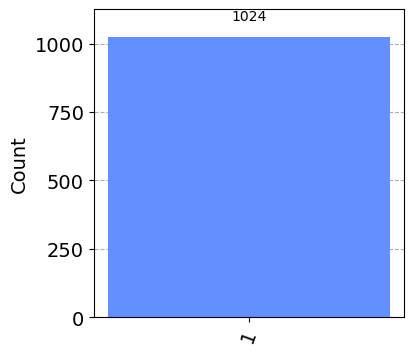

In [33]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

### Z Gate
***
Like X and Y, Z gate is a Pauli Gate. It is a a single-qubit rotation through π radians around the z-axis.

#### [Pauli-Z Gate;](https://medium.com/analytics-vidhya/quantum-gates-7fe83817b684)Medium

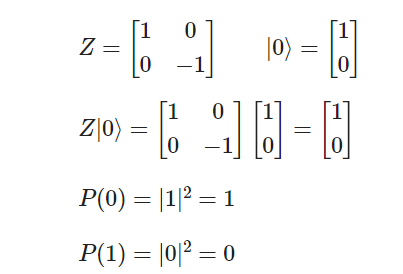

In [34]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.z(0)

# Measure.
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ Z ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


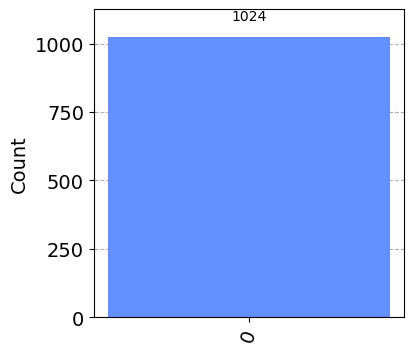

In [35]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

### T Gate
***
T gate is a very commonly used gate, it is a single-qubit operation given by: T

#### [T Gate;](https://www.quantum-inspire.com/kbase/t-gate/)Quantum-inspire

Single Qubit operation
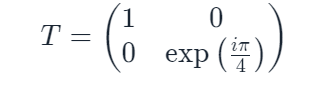

In [36]:
qc = QuantumCircuit(2)

#Apply T-gate to qubit 0
qc.t(0)

#Apply Tdg-gate to qubit 1
qc.tdg(1)

qc.draw()

┌───┐ 
q_0: ─┤ T ├─
     ┌┴───┴┐
q_1: ┤ Tdg ├
     └─────┘

In [37]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.t(0)

# Measure.
circuit.measure(0, 0)

# print the circuit
print(circuit)

     ┌───┐┌─┐
  q: ┤ T ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


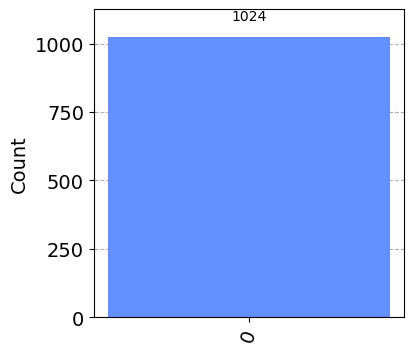

In [38]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

### CX Gate
***
CX is a controlled not gate, operates on a pair of qubits, one being the target and the other being the control. When control is in state it acts a NOT fucntion on the target. If the control is located at a superposition, the CX gates creates entanglement.

#### [CX Gate;](https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary/)Quantum-Computing.IBM

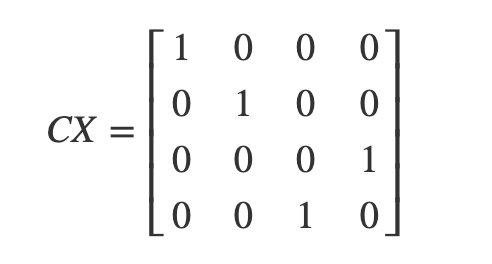

In [39]:
# system of many qubits
q = QuantumRegister(2)

# computational routine consisting of coherent quantum operations on qubits and more
qc = QuantumCircuit(q)

# using cx gate
qc.cx(q[0],q[1])

#draw
qc.draw()

q4_0: ──■──
      ┌─┴─┐
q4_1: ┤ X ├
      └───┘

In [40]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(2, 2)

# Add a gate.
circuit.cnot(0, 1)

# Measure.
circuit.measure((0, 1), (0, 1))

# print the circuit
print(circuit)

          ┌─┐   
q_0: ──■──┤M├───
     ┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


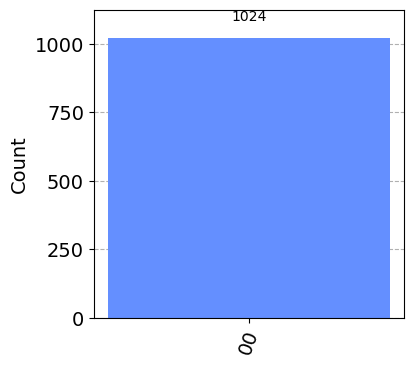

In [41]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

In [42]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(2, 2)

# Set the first qubit to |1>.
circuit.x(0)

# Add a barrier.
circuit.barrier()

# Add a gate.
circuit.cnot(0, 1)

# Measure.
circuit.measure((0, 1), (0, 1))

# print the circuit
print(circuit)

     ┌───┐ ░      ┌─┐   
q_0: ┤ X ├─░───■──┤M├───
     └───┘ ░ ┌─┴─┐└╥┘┌─┐
q_1: ──────░─┤ X ├─╫─┤M├
           ░ └───┘ ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1 


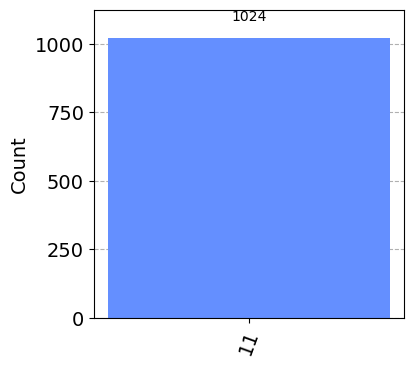

In [43]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(4, 4))

In [44]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(2, 2)

# using and applying H gate to first qubit.
circuit.h(0)

# Add a gate.
circuit.cnot(0, 1)

# Measure.
circuit.measure((0, 1), (0, 1))

# print the circuit
print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


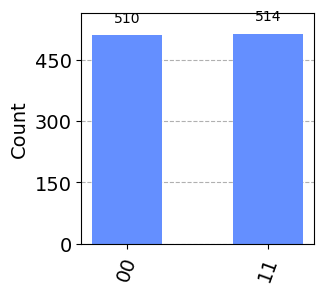

In [45]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(3, 3))

### SWAP Gate
***
The SWAP gate exchanges the two qubits.

#### [SWAP Gate;](https://www.quantum-inspire.com/kbase/swap/)Quantum-inspire

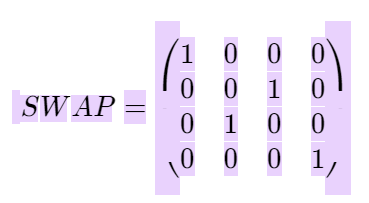

In [46]:
# using QuantumCircuit
qc = QuantumCircuit(q)

# applying swap gate
qc.swap(q[0], q[1])

# print
print(qc)

         
q4_0: ─X─
       │ 
q4_1: ─X─
         


### Toffoli Gate
***
Toffoli gate or ccx(Controlled-Controlled NOT gate) gate flips the third qubit if the first two qubits are |1>:

#### [Toffoli Gate;](https://www.quantum-inspire.com/kbase/toffoli/)Quantum-inspire

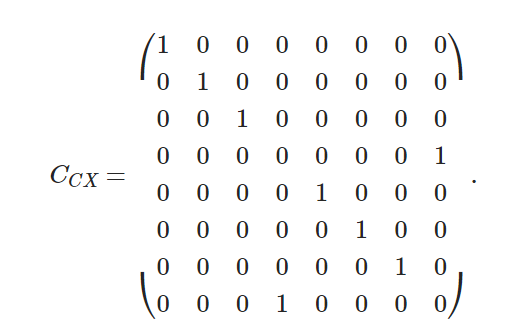

In [47]:
# using QuantumRegister & QuantumCircuit
q = QuantumRegister(3)
qc = QuantumCircuit(q)

# applyting gate
qc.ccx(q[0], q[1], q[2])

# print
print(qc)

           
q5_0: ──■──
        │  
q5_1: ──■──
      ┌─┴─┐
q5_2: ┤ X ├
      └───┘


### Oracles
***
An oracle is an unexposed operation that is used as input to another algorithm.

#### [Oracles;](https://quantumcomputing.stackexchange.com/questions/4625/what-exactly-is-an-oracle)Stackexchange

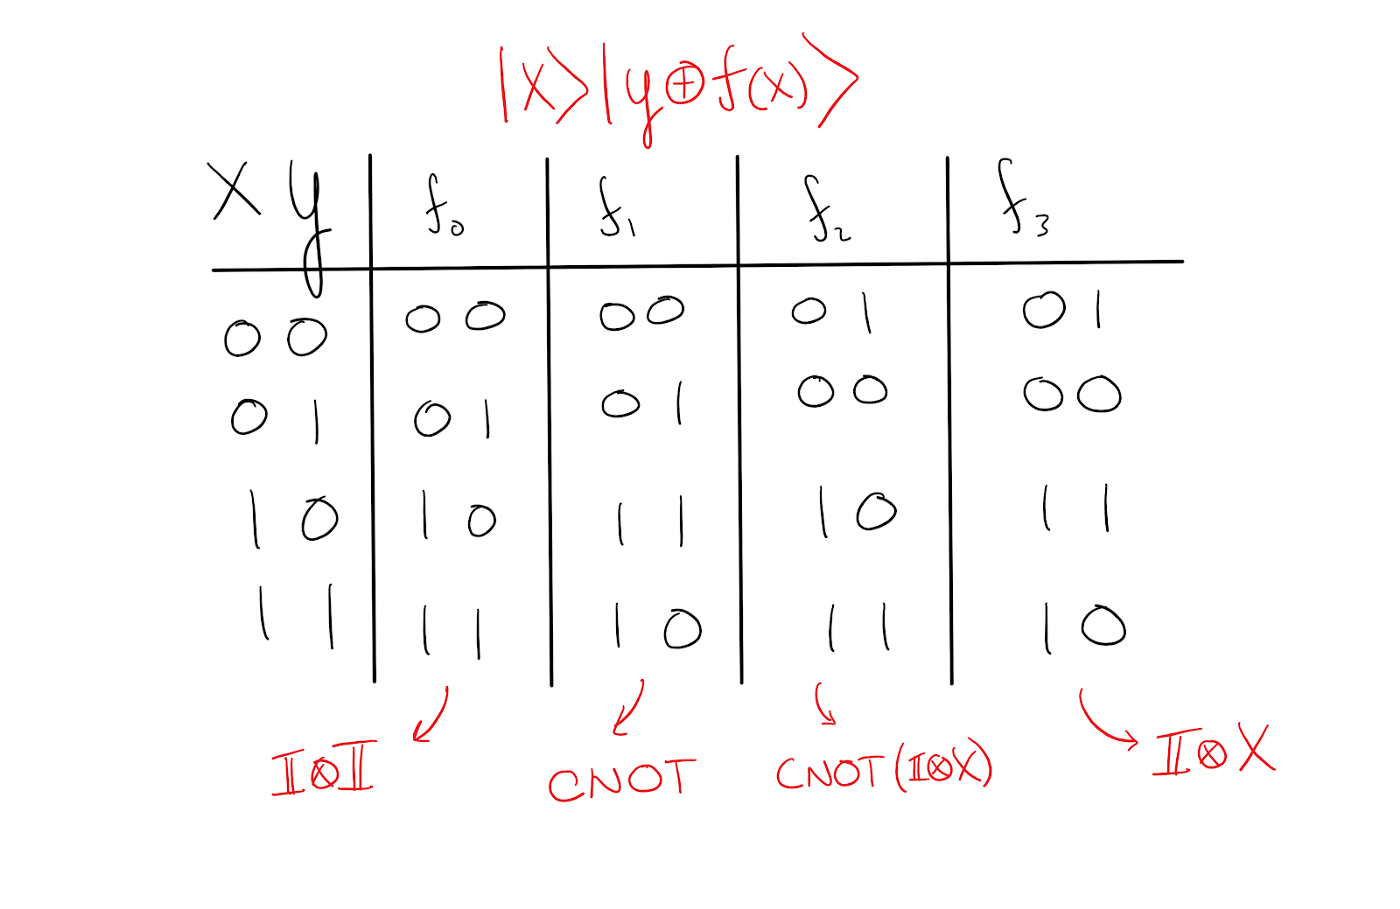

In [48]:
# using qiskit QuantumCircuit
top = qiskit.QuantumCircuit(2, 1)

# initialize oracle
top.initialize((1, 0), 0)
top.initialize((0, 1), 1)

# apply the h gate
top.h((0, 1))

# seperating the two circuits
top.barrier()

# print the circuit
print(top)

     ┌─────────────────┐┌───┐ ░ 
q_0: ┤ Initialize(1,0) ├┤ H ├─░─
     ├─────────────────┤├───┤ ░ 
q_1: ┤ Initialize(0,1) ├┤ H ├─░─
     └─────────────────┘└───┘ ░ 
c: 1/═══════════════════════════
                                


In [49]:
# using qiskit QuantumCircuit
end = qiskit.QuantumCircuit(2, 1)

# seperating the two circuits
end.barrier()

# apply the h gate
end.h(0)

# used for measuring qubits and mem_slots
end.measure(0, 0)

# print the circuit
print(end)

      ░ ┌───┐┌─┐
q_0: ─░─┤ H ├┤M├
      ░ └───┘└╥┘
q_1: ─░───────╫─
      ░       ║ 
c: 1/═════════╩═
              0 


### Constant 0 Function
A constant function is a fucntion in which the value is the same for every input in this case 0
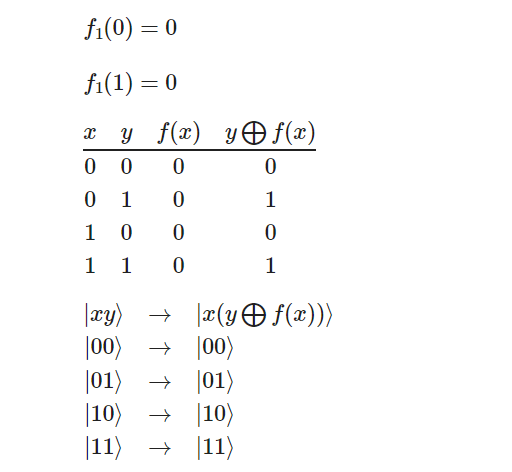

In [50]:
f1 = qiskit.QuantumCircuit(2, 1)

f1.i((0, 1))

print(f1)

     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ I ├
     └───┘
c: 1/═════
          


In [51]:
circuit = top + f1 + end

print(circuit)

     ┌─────────────────┐┌───┐ ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ Initialize(1,0) ├┤ H ├─░─┤ I ├─░─┤ H ├┤M├
     ├─────────────────┤├───┤ ░ ├───┤ ░ └───┘└╥┘
q_1: ┤ Initialize(0,1) ├┤ H ├─░─┤ I ├─░───────╫─
     └─────────────────┘└───┘ ░ └───┘ ░       ║ 
c: 1/═════════════════════════════════════════╩═
                                              0 


C:\Users\G0037\AppData\Local\Temp\ipykernel_5060\1935872458.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = top + f1 + end


In [52]:
sim = qiskit.Aer.get_backend('aer_simulator')

result = sim.run(circuit).result().get_counts()

print(result)

{'0': 1024}


### Constant 1 Function
A constant function is a fucntion in which the value is the same for every input in this case 1
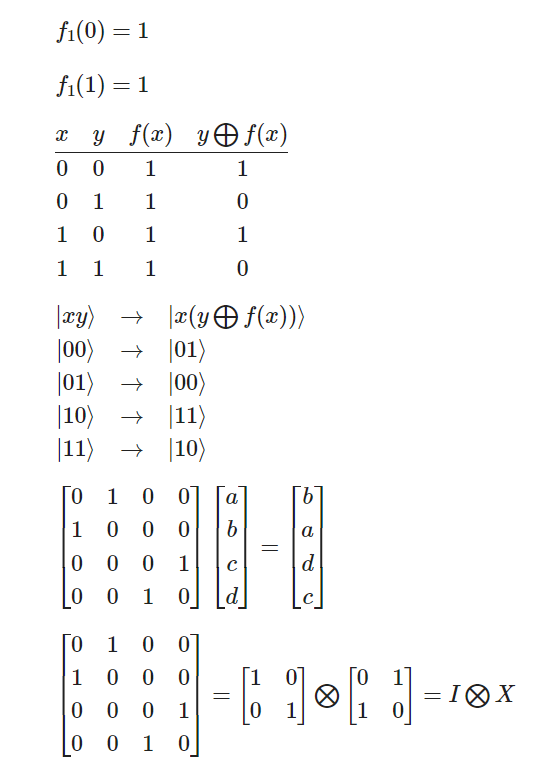


In [54]:
f4 = qiskit.QuantumCircuit(2, 1)

f4.i(0)

f4.x(1)

print(f4)

     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ X ├
     └───┘
c: 1/═════
          


In [55]:
circuit = top + f4 + end

print(circuit)

     ┌─────────────────┐┌───┐ ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ Initialize(1,0) ├┤ H ├─░─┤ I ├─░─┤ H ├┤M├
     ├─────────────────┤├───┤ ░ ├───┤ ░ └───┘└╥┘
q_1: ┤ Initialize(0,1) ├┤ H ├─░─┤ X ├─░───────╫─
     └─────────────────┘└───┘ ░ └───┘ ░       ║ 
c: 1/═════════════════════════════════════════╩═
                                              0 


C:\Users\G0037\AppData\Local\Temp\ipykernel_5060\3282863515.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = top + f4 + end


In [56]:
sim = qiskit.Aer.get_backend('aer_simulator')

result = sim.run(circuit).result().get_counts()

print(result)

{'0': 1024}


### Balanced Identity Function
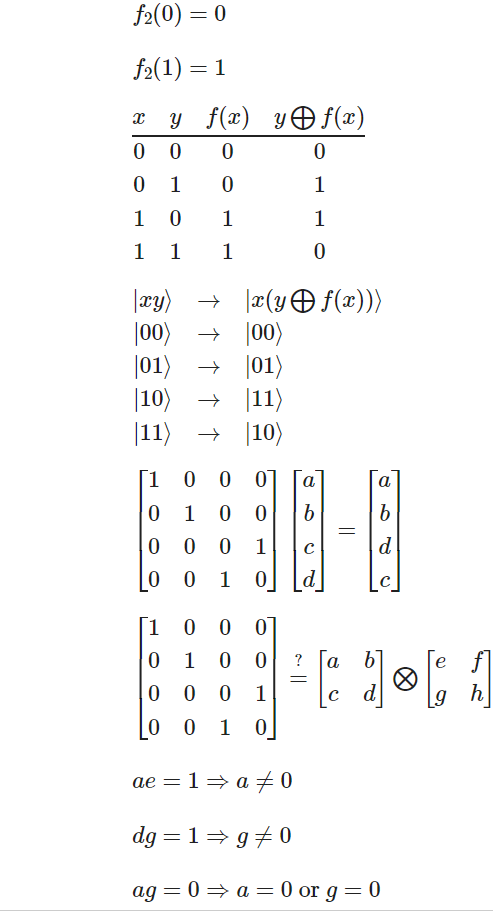

In [57]:
f2 = qiskit.QuantumCircuit(2, 1)

f2.cnot(0, 1)

print(f2)

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
c: 1/═════
          


In [58]:
circuit = top + f2 + end

print(circuit)

     ┌─────────────────┐┌───┐ ░       ░ ┌───┐┌─┐
q_0: ┤ Initialize(1,0) ├┤ H ├─░───■───░─┤ H ├┤M├
     ├─────────────────┤├───┤ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ Initialize(0,1) ├┤ H ├─░─┤ X ├─░───────╫─
     └─────────────────┘└───┘ ░ └───┘ ░       ║ 
c: 1/═════════════════════════════════════════╩═
                                              0 


C:\Users\G0037\AppData\Local\Temp\ipykernel_5060\2770052322.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = top + f2 + end


In [59]:
sim = qiskit.Aer.get_backend('aer_simulator')

result = sim.run(circuit).result().get_counts()

print(result)

{'1': 1024}


### Balanced Not Function
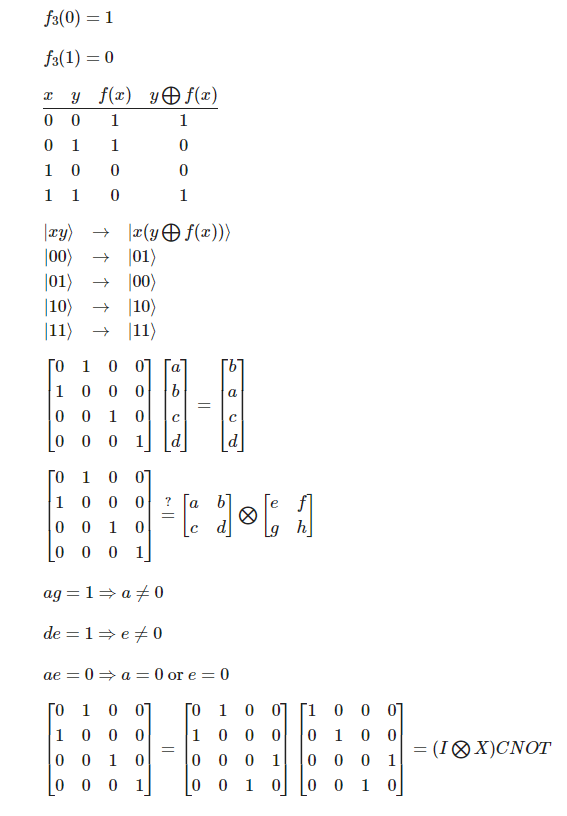

In [60]:
f3 = qiskit.QuantumCircuit(2, 1)

f3.i(0)

f3.x(1)

f3.cnot(0, 1)

print(f3)

     ┌───┐     
q_0: ┤ I ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
c: 1/══════════
               


In [61]:
circuit = top + f3 + end

print(circuit)

     ┌─────────────────┐┌───┐ ░ ┌───┐      ░ ┌───┐┌─┐
q_0: ┤ Initialize(1,0) ├┤ H ├─░─┤ I ├──■───░─┤ H ├┤M├
     ├─────────────────┤├───┤ ░ ├───┤┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ Initialize(0,1) ├┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └─────────────────┘└───┘ ░ └───┘└───┘ ░       ║ 
c: 1/══════════════════════════════════════════════╩═
                                                   0 


C:\Users\G0037\AppData\Local\Temp\ipykernel_5060\506934586.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = top + f3 + end


In [62]:
sim = qiskit.Aer.get_backend('aer_simulator')

result = sim.run(circuit).result().get_counts()

print(result)

{'1': 1024}


### Random Oracle
***
Random oracle is a theoretical construct used to model the behavior of a cryptographic hash function. In the context of quantum computing, random oracles can be used to model the behavior of quantum algorithms that are believed to be difficult to reverse or invert

#### [Random Oracle;](https://en.wikipedia.org/wiki/Random_oracle)Wikipedia

In [63]:
oracles = [f1, f2, f3, f4]

oracle = random.choice(oracles)

In [67]:
circuit = top + oracle + end

print(circuit)

     ┌─────────────────┐┌───┐ ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ Initialize(1,0) ├┤ H ├─░─┤ I ├─░─┤ H ├┤M├
     ├─────────────────┤├───┤ ░ ├───┤ ░ └───┘└╥┘
q_1: ┤ Initialize(0,1) ├┤ H ├─░─┤ I ├─░───────╫─
     └─────────────────┘└───┘ ░ └───┘ ░       ║ 
c: 1/═════════════════════════════════════════╩═
                                              0 


C:\Users\G0037\AppData\Local\Temp\ipykernel_5060\3863252502.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = top + oracle + end


In [65]:
sim = qiskit.Aer.get_backend('aer_simulator')

result = sim.run(circuit).result().get_counts()

print(result)

{'0': 1024}


In [66]:
if '1' in result:
    print('Balanced')
else:
    print('Constant')

Constant


### Exercises
***

#### Re-run the above simulations with the qubit set initially to |1>.

##### H Gate
***

In [76]:
# Create a quantum circuit with one qubit and one classical bit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

# Initialize the qubit in the |1> state
qc.x(q[0])

# Apply a Hadamard gate to the qubit
qc.h(q[0])

# Measure the qubit
qc.measure(q[0], c[0])

# Execute the quantum circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()

# Print the measurement result
print(result.get_counts())

{'1': 1}


##### X Gate
***

In [77]:
# Create a quantum circuit with one qubit and one classical bit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

# Initialize the qubit in the |1> state
qc.x(q[0])

# Apply a Pauli X gate (NOT gate) to the qubit
qc.x(q[0])

# Measure the qubit
qc.measure(q[0], c[0])

# Execute the quantum circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()

# Print the measurement result
print(result.get_counts())

{'0': 1}


##### Z Gate
***

In [78]:
# Create a quantum circuit with one qubit and one classical bit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

# Initialize the qubit in the |1> state
qc.x(q[0])

# Apply a Pauli Z gate to the qubit
qc.z(q[0])

# Measure the qubit
qc.measure(q[0], c[0])

# Execute the quantum circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()

# Print the measurement result
print(result.get_counts())

{'1': 1}


#### Adapt random_f to generate a random function that takes 3 bits (0 or 1 values) as input and returns a single bit.

In [79]:
def random_f():
    # Generate a random 3bit input
    x = [random.randint(0, 1) for _ in range(3)]

    # Generate a random output bit
    y = random.randint(0, 1)

    # Return the input output pair as a tuple
    return (x, y)

# Generate a random function
f = random_f()

# Print the input output pair
print(f)

([1, 0, 1], 1)


In [80]:
# Evaluate the function for the input [1, 0, 1]
input = [1, 0, 1]
output = f[1]

# Print the output
print(output)

1


#### Adapt random_f to generate a random function that is either constant or balanced, that takes 3 bits (0 or 1 values) as input and returns a single bit.

In [83]:
def random_f():
    # Generate a random 3-bit input
    x = [random.randint(0, 1) for _ in range(3)]

    # Generate a random output bit
    y = random.randint(0, 1)

    # Decide whether the function is constant or balanced
    if y == 0:
        # If y is 0, the function is constant
        # Set the output for all 3-bit inputs to y
        output = {tuple([b for b in range(2)]*3): y for _ in range(2**3)}
    else:
        # If y is 1, the function is balanced
        # Set the output for half of the 3-bit inputs to y and the other half to 1-y
        output = {tuple([b for b in range(2)]*3): y for _ in range(2**2)}
        output.update({tuple([1-b for b in range(2)]*3): 1-y for _ in range(2**2)})

    # Return the function
    return output

# Generate a random function
f = random_f()

# Print the function
print(f)

{(0, 1, 0, 1, 0, 1): 1, (1, 0, 1, 0, 1, 0): 0}


***
# End